### Introduction

This dataset, known as the "Drug 200 Dataset," contains information about 200 patients, including their demographic and medical data, as well as the type of drug they have been prescribed. The primary goal of this dataset is to help in the classification of the type of drug that a patient should be prescribed based on various features.

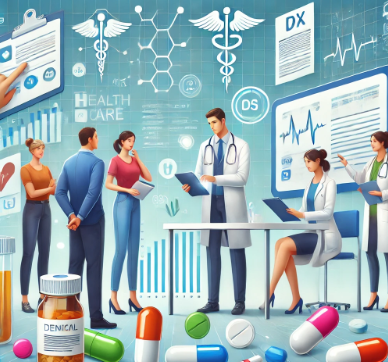


### Column Descriptions

1. **Age**: 
   - Represents the age of the patient.
   - Type: Integer

2. **Sex**: 
   - Indicates the gender of the patient, where 'M' stands for Male and 'F' stands for Female.
   - Type: Categorical (String)

3. **BP (Blood Pressure)**: 
   - This column denotes the blood pressure levels of the patient, which can be categorized into 'HIGH', 'NORMAL', and 'LOW'.
   - Type: Categorical (String)

4. **Cholesterol**: 
   - Represents the cholesterol level of the patient, which can be either 'HIGH' or 'NORMAL'.
   - Type: Categorical (String)

5. **Na_to_K (Sodium to Potassium Ratio)**: 
   - This is a continuous feature that represents the ratio of sodium to potassium in the patient's blood. It is an important factor in determining the type of drug to be prescribed.
   - Type: Float

6. **Drug**: 
   - The target variable, which indicates the type of drug prescribed to the patient. The possible values include 'drugA', 'drugB', 'drugC', 'drugX', and 'drugY'.
   - Type: Categorical (String)

## What will we learn?
- drug classification based on patient general information and its diagnosis. 
- various machine learning models to predict the outcome of the drugs type that might be suitable for the patient
    - used models: 
        - logistic regression
        - gaussian naive bayes
        - knn classifier
        - random forest classifier
        - svm classifier
        - xgb classifier

## importing libraries & reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

sns.set_style({"axes.grid":"True","grid.linestyle":":", "grid.color":"darkgray"})

/kaggle/input/drug200/drug200.csv


In [2]:
df = pd.read_csv("/kaggle/input/drug200/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## defining features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## individual graphs of features

<Axes: xlabel='Sex', ylabel='Count'>

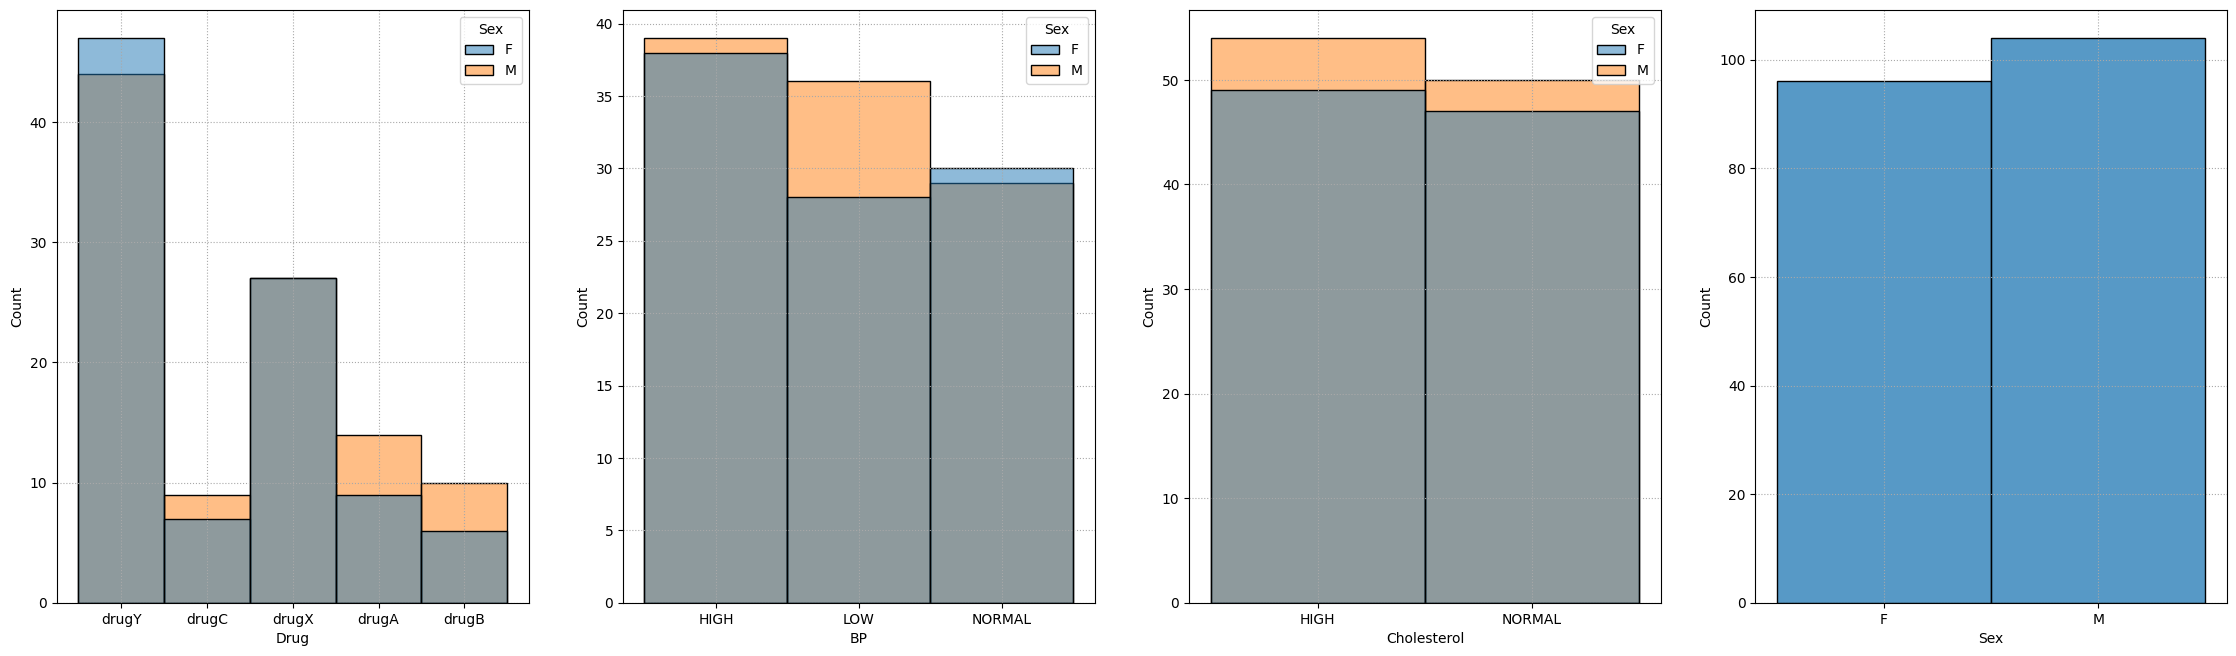

In [4]:
fig, ax = plt.subplots(1,4, figsize=(28,7.7))
sns.histplot(data=df, x="Drug", hue="Sex", ax=ax[0])
sns.histplot(data=df, x="BP", hue="Sex", ax=ax[1])
sns.histplot(data=df, x="Cholesterol", hue="Sex", ax=ax[2])
sns.histplot(data=df, x="Sex", ax=ax[3])

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='Na_to_K', ylabel='Count'>

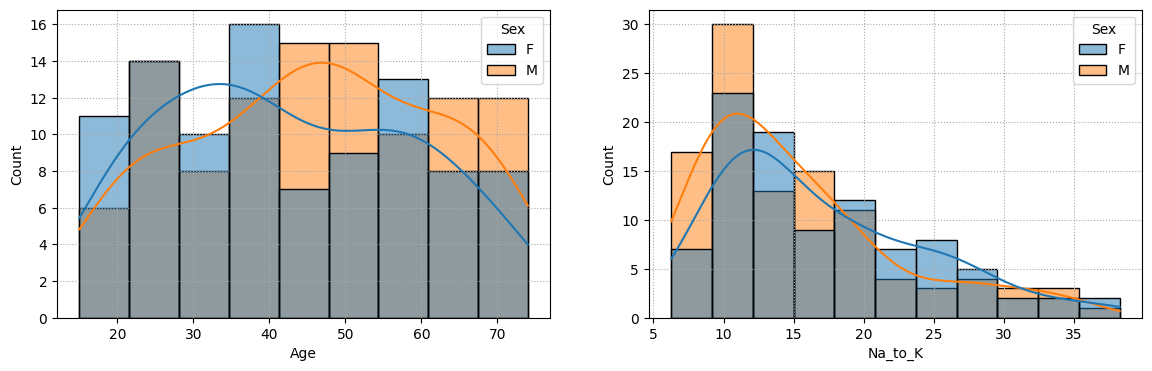

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
sns.histplot(data=df, x="Age", hue="Sex", kde=True, ax=axes[0])
sns.histplot(data=df, x="Na_to_K", hue="Sex", kde=True, ax=axes[1])

## exploration / EDA

Text(41.1732917906746, 0.5, 'Frequency')

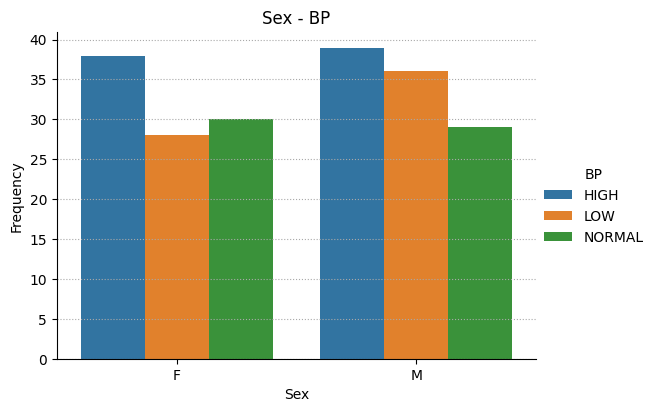

In [7]:
sns.catplot(x="Sex", hue="BP", data=df, kind="count", height=4, aspect=1.4)
plt.title("Sex - BP")
plt.ylabel("Frequency")

Text(41.1732917906746, 0.5, 'Frequency')

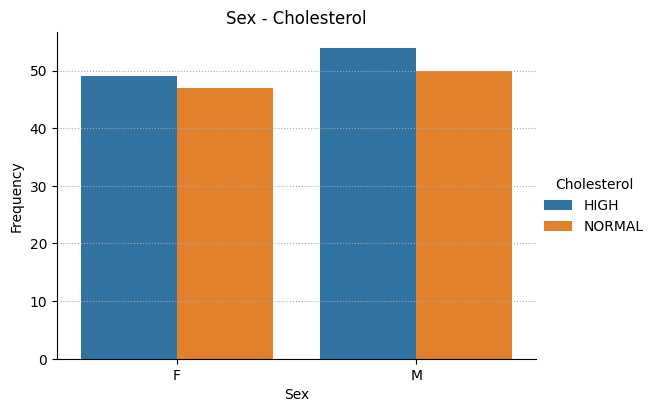

In [8]:
sns.catplot(x="Sex", hue="Cholesterol", data=df, kind="count", height=4, aspect=1.4)
plt.title("Sex - Cholesterol")
plt.ylabel("Frequency")

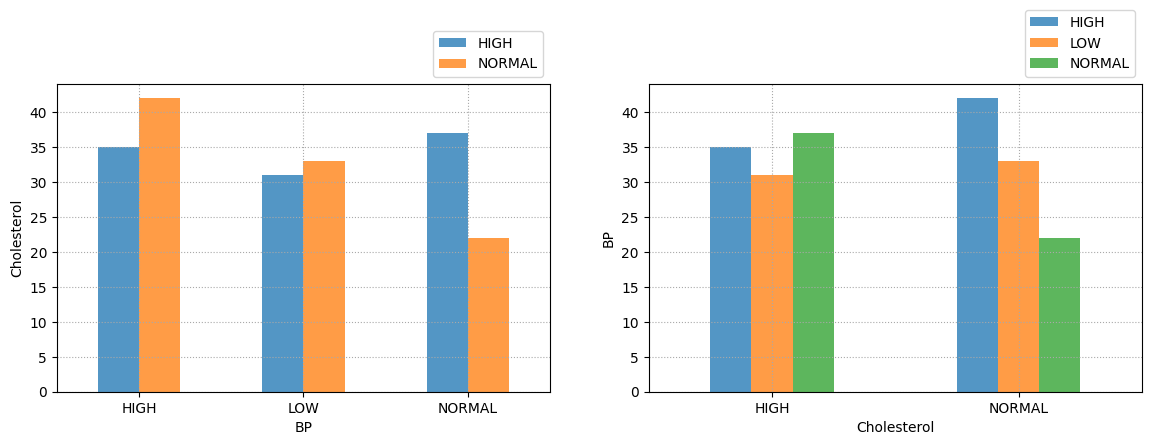

In [9]:
fig, axes = plt.subplots(1,2, figsize=(14,4))
pd.crosstab(df.BP, df.Cholesterol).plot(kind="bar", alpha=0.77, ax=axes[0])
pd.crosstab(df.Cholesterol, df.BP).plot(kind="bar", alpha=0.77, ax=axes[1])
axes[0].tick_params(labelrotation=0)
axes[1].tick_params(labelrotation=0)
axes[0].set_ylabel("Cholesterol")
axes[1].set_ylabel("BP")
axes[0].legend(loc="lower right", bbox_to_anchor=[1, 1])
axes[1].legend(loc="lower right", bbox_to_anchor=[1, 1])

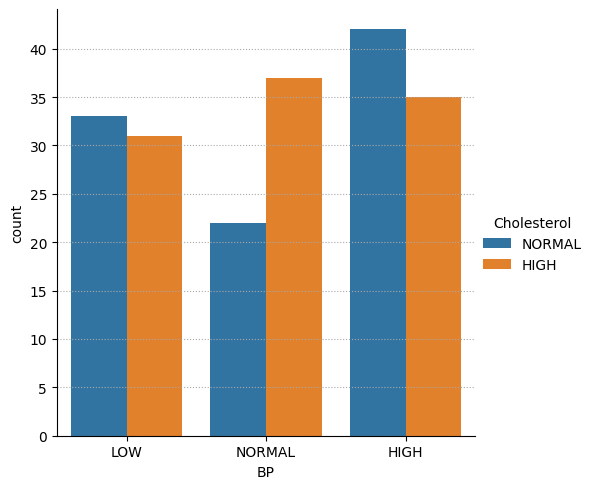

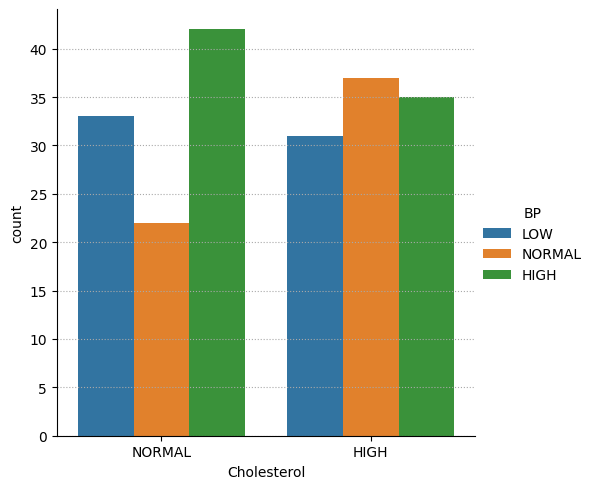

In [10]:
sns.catplot(x="BP", hue="Cholesterol", data=df, kind="count", order=["LOW", "NORMAL", "HIGH"], hue_order=["NORMAL", "HIGH"])
sns.catplot(x="Cholesterol", hue="BP", data=df, kind="count", order=["NORMAL", "HIGH"], hue_order=["LOW", "NORMAL", "HIGH"])

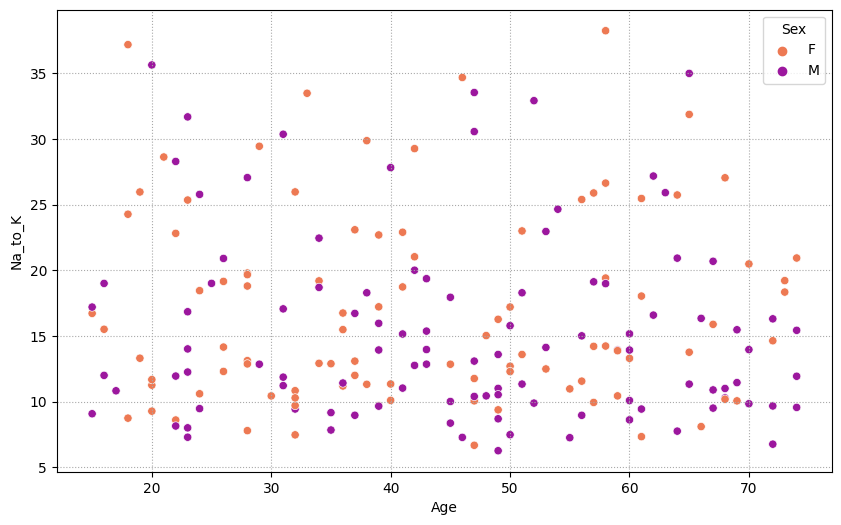

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.Age, y=df.Na_to_K, hue=df.Sex, palette="plasma_r")
plt.show()

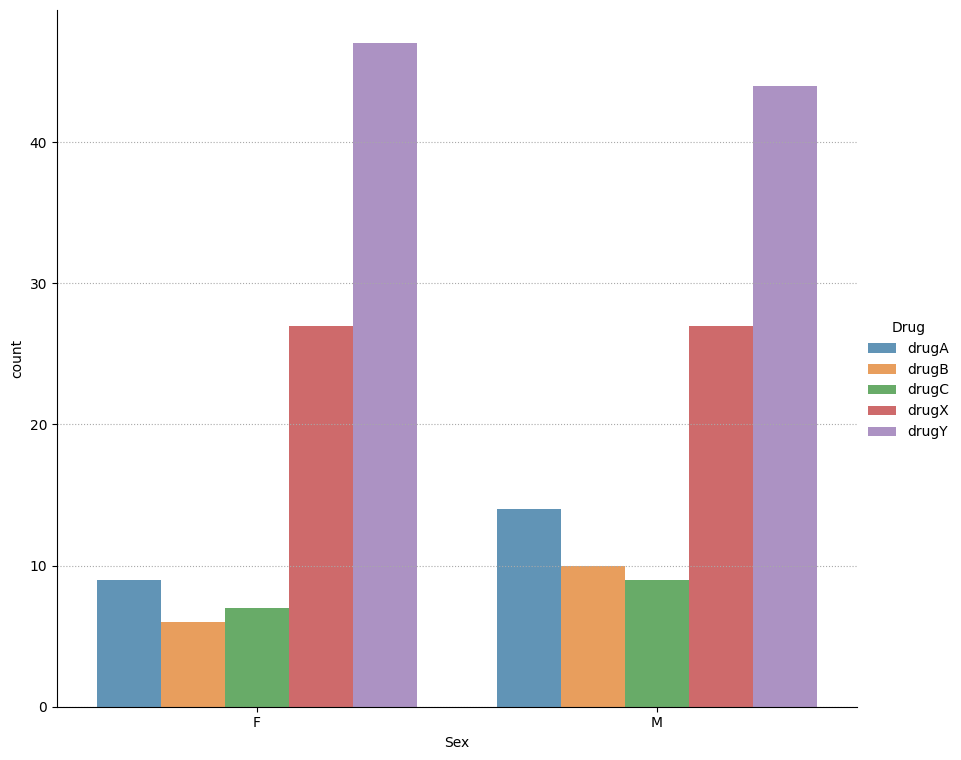

In [12]:
sns.catplot(data=df, x="Sex", hue="Drug", kind="count", hue_order=["drugA", "drugB", "drugC", "drugX", "drugY"], alpha=0.77, height=7.7, aspect=1.14)


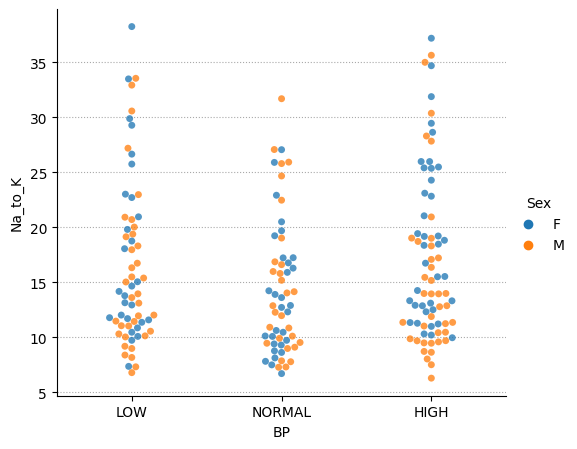

In [13]:
sns.catplot(x="BP", y="Na_to_K", hue="Sex", kind="swarm", data=df, alpha=0.77, height=4.6, aspect=1.14, order=["LOW", "NORMAL", "HIGH"])

In [14]:
df.Na_to_K.min()

6.269

In [15]:
df.Na_to_K.min()

6.269

In [16]:
df.Na_to_K.max()

38.247

In [17]:
df.Age.max()

74

## Data Preparation

#### data binning (categorise continous variables)

###### Bin Age

In [18]:
age_intervals = [0,19,29,39,49,59,69,90]
age_labels = ["<20s", "20s", "30s", "40s", "50s", "60s", ">60s"]
df["Age_cat"] = pd.cut(df.Age, bins=age_intervals, labels=age_labels)
df.drop("Age", axis=1, inplace=True)

###### Bin Na_to_K

In [19]:
NatoK_intervals = [0,9,19,29,39,90]
NatoK_labels = ["0-10", "10-20", "20-30", "30-40", ">40"]
df["Na_to_K_cat"] = pd.cut(df.Na_to_K, bins=NatoK_intervals, labels=NatoK_labels)
df.drop("Na_to_K", axis=1, inplace=True)

In [20]:
df

,Sex,BP,Cholesterol,Drug,Age_cat,Na_to_K_cat
0,F,HIGH,HIGH,drugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,0-10
4,F,LOW,HIGH,drugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


#### train-test split

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop("Drug", axis=1)
y = df.Drug
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

#### encoding

In [22]:
X_train

,Sex,BP,Cholesterol,Age_cat,Na_to_K_cat
121,M,HIGH,NORMAL,<20s,10-20
170,F,NORMAL,HIGH,20s,10-20
97,F,HIGH,HIGH,50s,20-30
197,M,NORMAL,HIGH,50s,10-20
85,M,HIGH,HIGH,50s,10-20
...,...,...,...,...,...
186,M,HIGH,HIGH,>60s,10-20
116,M,NORMAL,NORMAL,60s,10-20
40,F,NORMAL,HIGH,>60s,20-30
69,F,HIGH,NORMAL,<20s,20-30


In [23]:
X_train.columns

Index(['Sex', 'BP', 'Cholesterol', 'Age_cat', 'Na_to_K_cat'], dtype='object')

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first", sparse=False)
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)

In [25]:
ohe.feature_names_in_

array(['Sex', 'BP', 'Cholesterol', 'Age_cat', 'Na_to_K_cat'], dtype=object)

In [26]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object),
 array(['20s', '30s', '40s', '50s', '60s', '<20s', '>60s'], dtype=object),
 array(['0-10', '10-20', '20-30', '30-40'], dtype=object)]

In [27]:
X_encoded_columns=["Sex_M", "BP_LOW", "BP_NORMAL", "CHOLESTEROL_NORMAL", "AGE_30s", "AGE_40s", "AGE_50s", "AGE_60s", "AGE_less_than_20s", "AGE_greater_than_60s", "NatoK_10-20", "NatoK_20-30", "NatoK_30-40"]
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_encoded_columns)
X_train_encoded

,Sex_M,BP_LOW,BP_NORMAL,CHOLESTEROL_NORMAL,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_less_than_20s,AGE_greater_than_60s,NatoK_10-20,NatoK_20-30,NatoK_30-40
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
156,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_encoded_columns)
X_test_encoded

#### resampling

###### smote & random resample

In [29]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE()
under = RandomUnderSampler()
resampler = Pipeline(steps=[("o",over),("u",under)])
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_encoded, y_train)

In [30]:
X_train_resampled

,Sex_M,BP_LOW,BP_NORMAL,CHOLESTEROL_NORMAL,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_less_than_20s,AGE_greater_than_60s,NatoK_10-20,NatoK_20-30,NatoK_30-40
21,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
68,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
y_train_resampled

21     drugA
26     drugA
49     drugA
50     drugA
79     drugA
       ...  
127    drugY
45     drugY
12     drugY
68     drugY
120    drugY
Name: Drug, Length: 365, dtype: object

<Axes: xlabel='count', ylabel='Drug'>

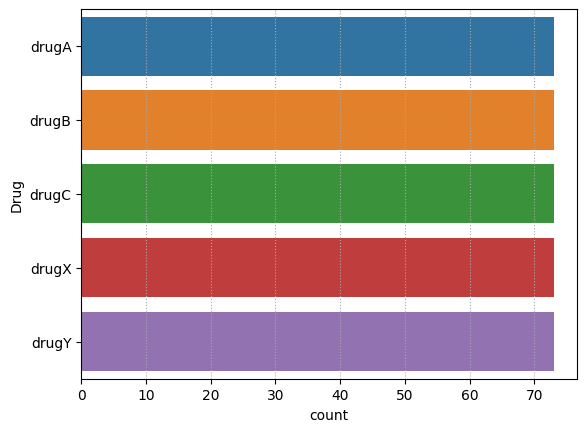

In [32]:
sns.countplot(data=df, y=y_train_resampled)

## model building

#### import models

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

#### parameter grids

In [34]:
#parameter grids
logreg_params = [{"penalty":["l2", "none"],"solver":["newton-cg", "lbfgs", "sag", "saga"],"C":[0.1, 0.5, 1, 10]},{"penalty":["elasticnet", "l1", "l2", "none"], "solver":["saga"], "C":[0.1, 0.5, 1, 10]}]
gnb_params = [{}]
knn_params = [{"n_neighbors":[4, 8, 12],"weights":["uniform", "distance"],"p":[1, 2]}]
rfc_params = [{"n_estimators":[50, 100, 150, 200],"criterion":["gini", "entropy"]}]
svm_params = [{"C":[0.1, 0.5, 1, 10], "kernel":["linear"]}, {"C":[0.1, 0.5, 1, 10], "gamma":["scale", "auto"], "kernel":["rbf", "sigmoid", "poly"], "degree":[2, 3, 4]}]
xgb_params = [{}]

#### model lists to feed in for loop

In [35]:
modelclasses = [
    ["logistic_regression", LogisticRegression(max_iter=1000), logreg_params],
    ["gaussian_naive_bayes", GaussianNB(), gnb_params],
    ["knn_classifier", KNeighborsClassifier(), knn_params],
    ["random_forest_classifier", RandomForestClassifier(), rfc_params],
    ["svm_classifier", SVC(), svm_params],
    ["xgb_classifier", XGBClassifier(), xgb_params]
]

#### runtime

In [ ]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import ConvergenceWarning

# Filter specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Encode target variables
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Use RandomizedSearchCV instead of GridSearchCV for optimization
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4)
results = pd.DataFrame([], columns=["f1_score_weighted", "roc_auc_score", "accuracy_score"])
best_hyperparameters = []

# Increase max_iter for Logistic Regression to handle convergence issues
for model_name, Model, param_grid in modelclasses:
    if model_name == 'LogisticRegression':
        param_grid['max_iter'] = [500, 1000]  # Increase max_iter to ensure convergence
    
    # Use RandomizedSearchCV (with n_iter to speed up random search)
    gridsearch = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, cv=cv, n_jobs=-1, n_iter=20, random_state=42)
    gridsearch.fit(X_train_resampled, y_train_resampled_encoded)
    
    # Predictions and results
    y_pred = gridsearch.predict(X_test_encoded)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)  # Decode predictions for evaluation
    
    f1 = f1_score(y_test, y_pred_decoded, average="weighted")
    rocauc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_decoded))
    acc = accuracy_score(y_test, y_pred_decoded)
    
    results.loc[model_name] = [f1, rocauc, acc]
    best_hyperparameters.append((model_name, gridsearch.best_params_))


#### model comparison

In [37]:
results

,f1_score_weighted,roc_auc_score,accuracy_score
logistic_regression,0.698847,0.867257,0.700
gaussian_naive_bayes,0.724134,0.876219,0.725
knn_classifier,0.676170,0.827536,0.675
random_forest_classifier,0.679287,0.849059,0.675
svm_classifier,0.673297,0.859138,0.675
xgb_classifier,0.756905,0.873715,0.750


#### best parameters for each model

In [38]:
best_hyperparameters

[('logistic_regression', {'solver': 'saga', 'penalty': 'l2', 'C': 10}),
 ('gaussian_naive_bayes', {}),
 ('knn_classifier', {'weights': 'uniform', 'p': 1, 'n_neighbors': 4}),
 ('random_forest_classifier', {'n_estimators': 200, 'criterion': 'gini'}),
 ('svm_classifier', {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 10}),
 ('xgb_classifier', {})]

#### confusion matrix

In [39]:
y_pred

array([3, 3, 2, 1, 0, 4, 4, 4, 0, 1, 4, 3, 4, 0, 4, 3, 1, 2, 4, 3, 4, 3,
       0, 4, 4, 0, 4, 3, 4, 4, 4, 4, 3, 3, 1, 3, 4, 3, 2, 4])

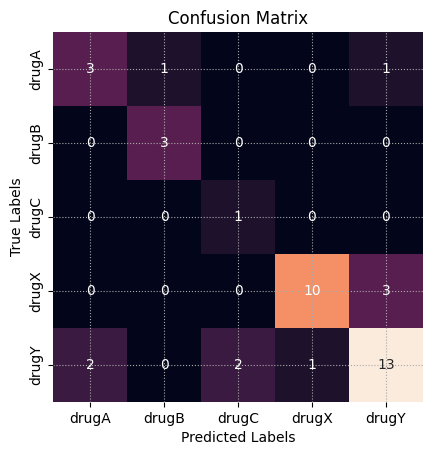

In [40]:
# Encode y_test to match the type of y_pred
y_test_encoded = label_encoder.transform(y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cbar=False, square=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix provides a detailed view of the model's performance by comparing the true labels (rows) with the predicted labels (columns).

#### Key Observations:
- **True Positives**: The model correctly predicted drugX (10 instances) and drugY (13 instances) most frequently.
- **Misclassifications**: There are notable misclassifications, particularly in the case of drugY, where 2 instances were predicted as drugA and drugC. Similarly, drugX was misclassified as drugY in 3 cases.
- **Class Imbalance**: The distribution of correct predictions varies significantly across different drug classes, with drugX and drugY having higher correct predictions, indicating possible class imbalance or model bias towards these classes.

#### Conclusion:
While the model shows decent accuracy for drugX and drugY, the overall performance suggests room for improvement, particularly in reducing misclassifications and improving the model's ability to distinguish between similar classes. Further tuning, including balancing the dataset or applying advanced techniques like ensemble methods, could potentially enhance the model's performance across all classes.